this data for site udemy.com , this is most popular website for online courses 
we will get more benifits from this data for example 

- what is most popular couses ?
- what is top rating courses ?
- what is kind populate students ?
- what is heigh courses price ?
- what is low courses price ?

and more information used by data science .

- for download this data you can visit the source from kaggle.com 

- https://www.kaggle.com/andrewmvd/udemy-courses

for work at this project we will used the ( CRISP - DM ) Rules in data science .
(Cross-industry standard process for data mining)

# The CRISP - DM including this steps .

- I. Business Understanding
- II. Data Understanding
- III. Data Preparation
- IV. Modeling
- V. Evaluation
- VI. Deployment



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import folium
import plotly_express
from sklearn.model_selection import cross_val_score
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn.linear_model import LinearRegression 
df = pd.read_csv('udemy_courses.csv')
import sys
#sys.setrecursionlimit(10000)


#print head data
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [2]:
# Print The all coumnns in dataframe.

for x in df.columns:
    print(x)

course_id
course_title
url
is_paid
price
num_subscribers
num_reviews
num_lectures
level
content_duration
published_timestamp
subject


In [3]:
#print how many columnns and rows in dataframe .

df.shape

(3678, 12)

In [4]:
# More info for data types and columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
# Describe data.

df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [6]:
df['num_lectures'].mean()

40.108754758020666

# EDA 

In [7]:

size = df.size
  
# dataframe.shape
shape = df.shape
  
# dataframe.ndim
df_ndim = df.ndim
  

  
# printing size and shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))
  


Size = 44136
Shape =(3678, 12)
Shape[0] x Shape[1] = 44136


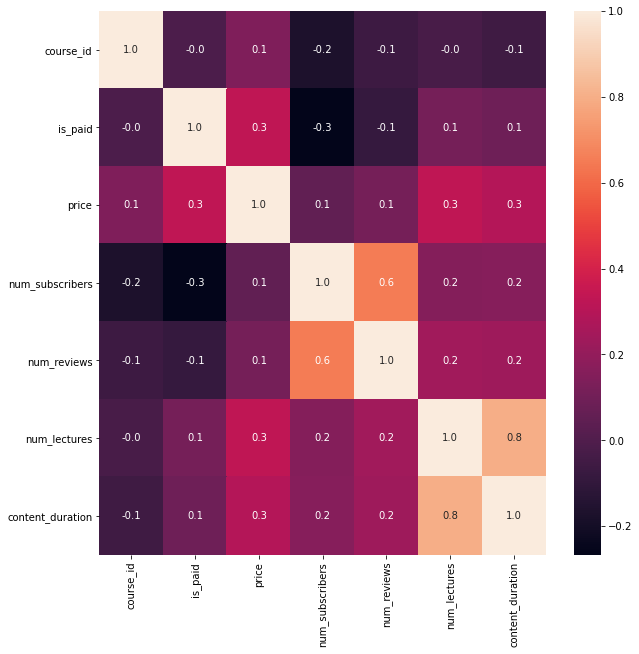

In [8]:


plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot=True, fmt='.1f')
plt.show()

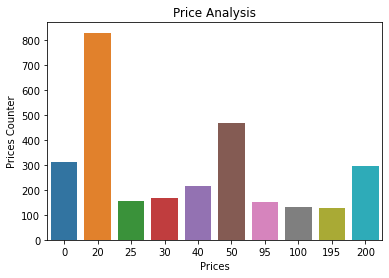

In [9]:
#vis data for age
sns.barplot(x= df.price.value_counts()[:10].index , y=df.price.value_counts()[:10].values)
plt.xlabel('Prices')
plt.ylabel("Prices Counter")
plt.title("Price Analysis")
plt.show()

<AxesSubplot:>

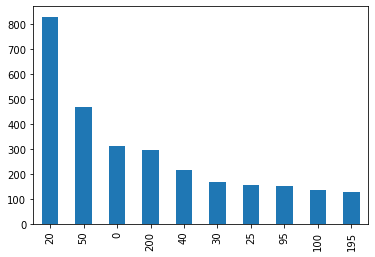

In [10]:
df['price'].value_counts(sort=True).nlargest(10).plot.bar()

<AxesSubplot:>

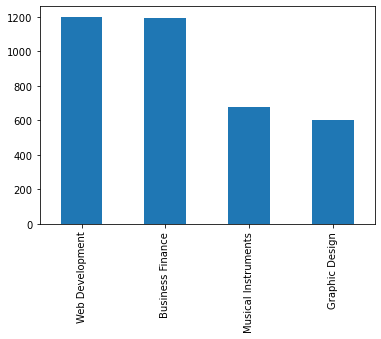

In [11]:
df['subject'].value_counts(sort=True).nlargest(10).plot.bar()

<AxesSubplot:>

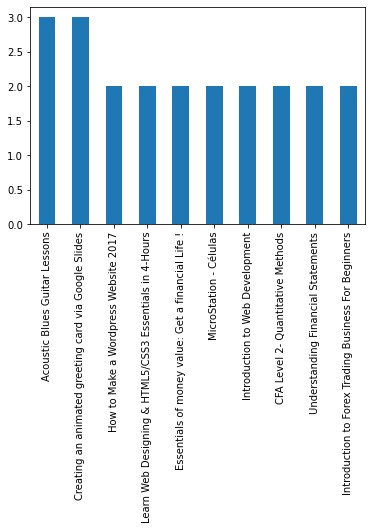

In [12]:
df['course_title'].value_counts(sort=True).nlargest(10).plot.bar()

<AxesSubplot:ylabel='subject'>

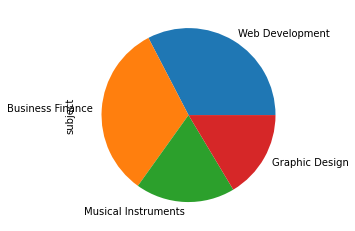

In [13]:
df['subject'].value_counts().plot.pie()

<AxesSubplot:ylabel='level'>

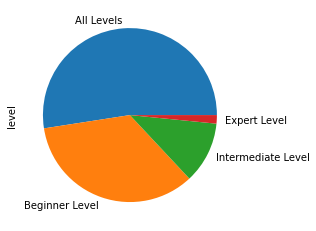

In [14]:
df['level'].value_counts().plot.pie()

In [15]:
show = df[['subject','price']].groupby('subject').mean().sort_values(by='price', ascending=False)
show 
    

,price
subject,
Web Development,77.033333
Business Finance,68.552301
Graphic Design,57.827529
Musical Instruments,49.558824


<AxesSubplot:xlabel='subject'>

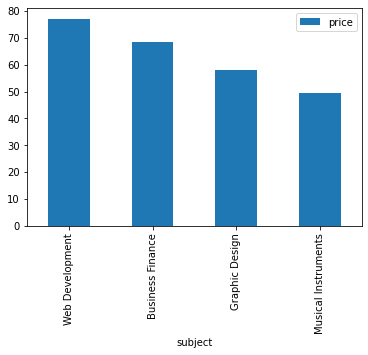

In [16]:
show.plot.bar()

# we will look the data and apply the steps CRISP - DM

- Step 1 - 2 : Business understand & Data understand

in this step we need to get answers for some questions from data like examples

1- what is the level students take the course Introduction to Web Development ?

2- how many lectures for all courses ?

3- what is courses published in year 2017  ?

4- show all sttudent level used by barchart .

# the first question : what is level students take the course Introduction to Web Development ?

In [17]:
def level_students():
    
    """
    for answer this question we need to explore the columns  
    [course_title] and [level].
    
    """
    
    #count all types in the varibles course_title
    print(" The All Count course_title  \n \n" + str(df['course_title'].value_counts()) + "\n\n")
    
    #count all types in the varibles Country
    print(" The All Count level  \n \n " + str(df['level'].value_counts())  + "\n\n")
    
    #selected the data we need to get only based on the question .
    interrmediate_Courses = df.loc[(df['course_title'] == 'Introduction to Web Development') & (df['level'])]
    
    #Display The Answer
    print(" The level for students take course Introduction to Web Development" + str(len(interrmediate_Courses)))
    
    #Display the data frame .
    return interrmediate_Courses.head(3)
    
    
level_students() 

 The All Count course_title  
 
Acoustic Blues Guitar Lessons                             3
Creating an animated greeting card via Google Slides      3
How to Make a Wordpress Website 2017                      2
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours    2
Essentials of money value: Get a financial Life !         2
                                                         ..
Classical Guitar Essentials - The Basics Part 2           1
Stock Technical Analysis with Python                      1
The Complete Guide to JavaScript Development              1
How to create a  video blog with WordPress                1
2. Principles of Simple Interest - advanced problems      1
Name: course_title, Length: 3663, dtype: int64


 The All Count level  
 
 All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64


 The level for students take course Introduction to Web Development2


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2607,178640,Introduction to Web Development,https://www.udemy.com/introduction-to-web-deve...,True,50,5921,35,42,Beginner Level,4.5,2014-03-11T19:43:30Z,Web Development
2660,99986,Introduction to Web Development,https://www.udemy.com/introduction-to-web-deve...,True,20,18143,159,15,Beginner Level,2.0,2013-10-04T13:40:59Z,Web Development


# the second question :  how many lectures for all courses ?

In [18]:
def courses_big_lectures():
    
    """
    for answer this question we need to explore the columns  
    [course_title] and [num_lectures].
    
    """
    
    #count all types in the varibles course_title
    print(" The All Count course_title  \n \n" + str(df['course_title'].value_counts()) + "\n\n")
    
    #count all types in the varibles Country
    print(" The All num_lectures  \n \n " + str(df['num_lectures'].value_counts())  + "\n\n")
    
    
    
    #print  how many lectures in all courses  .
    
    courses_ttitle = df['course_title']
    
    num_lectures = df['num_lectures']
    
    for l, n in zip(courses_ttitle, num_lectures):
        
        print(f' Course Title : {l}')
        
        
        print(f' Number lectures: {n}')
        
        
    return  Courses_lectures
    
    
#Calledd Function    
courses_big_lectures() 

 The All Count course_title  
 
Acoustic Blues Guitar Lessons                             3
Creating an animated greeting card via Google Slides      3
How to Make a Wordpress Website 2017                      2
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours    2
Essentials of money value: Get a financial Life !         2
                                                         ..
Classical Guitar Essentials - The Basics Part 2           1
Stock Technical Analysis with Python                      1
The Complete Guide to JavaScript Development              1
How to create a  video blog with WordPress                1
2. Principles of Simple Interest - advanced problems      1
Name: course_title, Length: 3663, dtype: int64


 The All num_lectures  
 
 12     121
15     109
13     107
14     105
11     104
      ... 
342      1
332      1
330      1
320      1
779      1
Name: num_lectures, Length: 229, dtype: int64


 Course Title : Ultimate Investment Banking Course
 Number lect

NameError: name 'Courses_lectures' is not defined

# The question 3 : what is date for published courses ?

In [ ]:
def courses_and_data():  
    
    """
    in this answer need to print what is dates for published courses .
    we will select the columns ['course_title'] andd ['published_timestamp']
    
    """
    
    Courses_name = df['course_title']
    
    Courses_lecture = df['published_timestamp']
    
    #used the functio zip in python.
    for l, n in zip(Courses_name, Courses_lecture):
        
        print(f' Course Title : {l} \n')
        
        print(f'    Published Date: {n} \n')
     


courses_and_data()        
    


# Question 4 : Provide a pandas series of the all student level values in the dataset , used barchart .

In [ ]:
def sttudent_Levels():
    
    """
    in this question need to provide the student levels 
    used by bar chart .
    """
    
    
    #count the programhobby varible and make bar chart 
    status_vals = df['level'].value_counts()
    
    #devision thee counts at the shape then make bar chart
    (status_vals/df.shape[0]).plot(kind="bar");
    
    #assign the title 
    plt.title("The Studen level ");


#called function
sttudent_Levels()
    


In [ ]:
# representing the data in heatmap 
sns.heatmap(df.corr(), annot=True, fmt='.2f');


# The free courses by subject .

In [ ]:
df[df['is_paid']==0].groupby('subject')['num_subscribers'].sum().sort_values(ascending=True).plot(kind='barh')

# Best paid courses by subject.

In [ ]:
df[df['is_paid']==1].groupby('subject')['num_subscribers'].sum().sort_values(ascending=True).plot(kind='barh')

# Most popular free courses 

In [ ]:
df[df['is_paid']==0].groupby('course_title')['num_subscribers'].sum().sort_values(ascending=True).nlargest(10).plot(kind='barh')

# Most popular paid courses

In [ ]:
df[df['is_paid']==1].groupby('course_title')['num_subscribers'].sum().sort_values(ascending=True).nlargest(10).plot(kind='barh')

# step 3  : Prepare Data  

 in this step we will working around data and make cleaning data 
  and need to know some info same 
  
 - **what is percent missing values in the varibles**
 - **what is varibles have more missing values** 
 - **what is frequent values in the varibles**
 - **what is the best decesion for missing values**
 - **Assign the predicts varibles and Response varibles**


In [ ]:
def Perecnt_Missing():
    
    '''
    we need to get the percent missing values 
    in all columns for see what is varibles 
    have more missing values.
    
    Missing Values :
    
    the first step in preparing data the "Missing Values" 
    In statistics, missing data, or missing values,
    occur when no data value is stored for the variable
    in an observation Missing data are a common occurrence and 
    can have a significant effect on the conclusions
    that can be drawn from the data.
    '''
    
    #select the missing values and get sum then 
    #multiplication * 100 then division at the len dataframe 
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'Column_name': df.columns,
                                 'percent_missing': percent_missing})
    
    #Display from 0 to 20 columns
    return missing_value_df[0:20]


#called function
Perecnt_Missing()

# Prepare data for modeling ..

- Chose the predicts varibles inside list and check the missing values in this varibles
- Assign the predict varible
- Assign the responnse varible

In [19]:
def Process_Data_For_ML(df):
    
    '''
    Predicted Varible :
    
    Predictor variable is the name given to an independent
    variable used in regression analyses The predictor 
    variable provides information on an associated dependent 
    variable regarding a particular outcome The term predictor
    variable arises from an area of applied mathematic that uses
    probability theory to estimate future occurrences of an event
    based on collected quantitative evidence.
    '''
 
    #in this code we will know how many percent the missing values in predict varibles 
    #create list have the Predicted Varible 
    
    predict_varibles  = df[['num_lectures' , 'num_reviews' , 'level', 'content_duration']]
    
    #get the sum missing values and multiplication * 100 then division at the len dataframe
    percent_missing = predict_varibles.isnull().sum() * 100 / len(df)
    
    
    #Display
    
    print(percent_missing)
    
    
    '''
    Convert The Predict Category Varible To Quantitative. 
    
    In science Machine learning, we use machine learning algorithms
    Those algorithms take the data that we will identify in the prediction
    and response variables and train the model on them so that it can predict
    more accurate values that are suitable for dependence But if the data for 
    those variables is text, we will convert them into digital data, between 0 and 1
    which is because machine learning algorithms  work on Quantitative data 
    so that they can predict more accurate values in the model
    
    '''
    
    

    #used get_dummies method for transfer Category to 0 nad 1.
    
    df_new = pd.get_dummies(predict_varibles, dummy_na=False)
    
    
    '''
     
    get_dummies :
    
    the get_dummies is metthod used for Convert 
    categorical variable into dummy/indicator variables.
    
    Concat :
    
    Pandas concat() method is used to concatenate pandas
    objects such as DataFrames and Series.
    we use (concat) after used the method get_dummies
    for add the new varibles That was converted from  
    Category to Quantitative to DataFrame .
    
    '''

    #add the new data to data framne used method concat.
    
    df = pd.concat([df , df_new], axis=1)
    
    
    
    #drop the main varibles after concat. 
    df.drop('num_lectures',axis='columns', inplace=True)
    df.drop('num_reviews',axis='columns', inplace=True)
    df.drop('level',axis='columns', inplace=True)
    df.drop('content_duration',axis='columns', inplace=True)
    

    #add global functon to predict varible for used out main method
    
    global X

    #Assign the predicted varibles called X
    
    X = df_new

    #add global functon to predict varible for used out main method
    
    global Y
       
    '''
    Response Varible :
    
    Response variables are also known as dependent variables,
    y-variables, and outcome variables. Typically, you want to
    determine whether changes in the predictors are associated 
    with changes in the response.
    
    For example, in a plant growth study, the response variable
    is the amount of growth that occurs during the study. 
    The investigators want to determine how changes in the
    predictors are associated with changes in plant growth. 
    The predictors are the amount of fertilizer applied,
    the soil moisture, and the amount of sunlight.
    
    "Meet Jim"
    '''
    
    #Assign the Response varible called Y
    
    Y = df['price']
    

    
    #return data head 
    return (X.head())
    
    
        
    
    
#called function
Process_Data_For_ML(df)

num_lectures        0.0
num_reviews         0.0
level               0.0
content_duration    0.0
dtype: float64


,num_lectures,num_reviews,content_duration,level_All Levels,level_Beginner Level,level_Expert Level,level_Intermediate Level
0,51,23,1.5,1,0,0,0
1,274,923,39.0,1,0,0,0
2,51,74,2.5,0,0,0,1
3,36,11,3.0,1,0,0,0
4,26,45,2.0,0,0,0,1


### Type of problem.

In this model, we provide a solution to a problem of (LinearRegression) in machine Learning science and all under the category of directed learning, these problems are concerned with predicting prices in the majority of problems that need solutions of this type.

Super vised learning problems have several algorithms One of the most famous (LinearRegression) Which we will apply in building this model

In [21]:
def data_modeling():
    
    '''
    in this section we will building the model
    for predict the salary based on the 
    Predict data .
    '''

#split data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state=42) 

# Instantiate Model
model = LinearRegression(normalize=True) 

#Fit Model
model.fit(X_train, Y_train) 

#Predict and score the model
predict = model.predict(X_test) 

#Display Predict
print(predict[0:100])

#called function
data_modeling()

[ 54.   55.   65.   58.   49.5  68.5  67.5  58.   59.   61.   51.   71.5
  50.   72.   50.  104.   64.5  69.   73.5  84.   47.   82.5  51.   87.5
  64.   57.5  73.   52.5  54.   82.   47.   58.5  58.5  47.5  73.   62.
  46.5  66.   47.5  67.   76.   52.   52.5  55.5  58.5  64.   49.5  72.
  47.5  57.5  61.  211.   63.   56.5  51.5  49.5  73.5  51.5  73.   48.
  52.   74.   74.   86.5  50.   65.5  48.5  53.   68.   60.5  54.  102.
  92.5  69.   60.5  96.   60.   66.   61.5  60.   64.5  53.5  63.5  72.5
  62.   71.  108.5  61.5  50.   59.   66.   66.5  63.   67.5  90.   58.5
  51.   56.5  72.5  70.5]


After building the model and training it on the training data and dividing the data into training and testing data, we tested the model on a set of data to predict the prices of the courses according to the response variable data.

# Model Accurecy. 

In linear regression problems, we have some well-known algorithms in evaluating the performance of the model, which we will apply to our model

Among the most famous evaluation algorithms used with regression problems are

- 1- mean_squared_error
- 2- mean_absolute_error
- 3- r2_score

In [24]:
#Model Accurecy.
def evaluated():
    
    '''
    this is final step in analysis 
    we will evaluated Results model
    used by Accuricy algorithms
    '''
    
    #Accuracy Model used Algorithm (Mean Squared Error)
    print("The mean squared score for the model {} ".format(mean_squared_error(Y_test, predict)))
    
    #Accuracy Model used Algorithm (mean_absolute_error)
    print("The mean_absolute_error for the model {}".format(mean_absolute_error(Y_test, predict)))
    
    #Accuracy Model used Algorithm (R2)
    print("The R2 score for the model {} ".format(r2_score(Y_test, predict)))
    
evaluated()

The mean squared score for the model 3362.33740942029 
The mean_absolute_error for the model 45.19202898550725
The R2 score for the model 0.11244345082514418 


In [23]:
# used cross validation for split data .
def cross_val():
    
    '''
    Cross-validation is a statistical method used to 
    estimate the skill of machine learning models.
    '''
    
    
    scores = cross_val_score(model , X , Y , cv=5)
    print(scores)

cross_val()

[0.03957751 0.04846695 0.03222555 0.12681011 0.1768304 ]
